## Task:  clean,analyze and Build classification models for 'advertising' dataset 'click on ads' is your targert

In [63]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
# loading data
df = pd.read_csv("advertising.csv")

In [65]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [66]:
# checking Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


from the info there no null values and data type look good except for timestamp columns need to be change to datetime

In [67]:
# checking null values
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [68]:
# checking for dublicates
df.duplicated().sum()

0

In [69]:
# statistical description for numerical features
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [70]:
# statistical description for catigorical features
df.describe(include="O")

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Cloned 5thgeneration orchestration,Lisamouth,France,2016-03-27 00:53:11
freq,1,3,9,1


From the above table for object features:
1. Ad Topic Line feature values are all unique values that why it will not serve the prediction model and need to be droped.
2. City feauture have 969 unique values so it is useless for the model. 
3. Country features vlaues has 237 unique value with high freq of France as mode is only 9 values or customers out of 1000 and this will make very diffecult for the model to create valuble relation ship as uniqueness is very high and it is better to be also drop.
4. Timestamp feature is usles as it is unique and it is not indicat or have significant effect on the model so we can drop it. 

In [71]:
# droping the above columns:
df.drop(['Ad Topic Line', 'City', 'Country','Timestamp'], axis = 1, inplace=True)

In [72]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [73]:
# checking the balance of data for target 
df["Clicked on Ad"].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

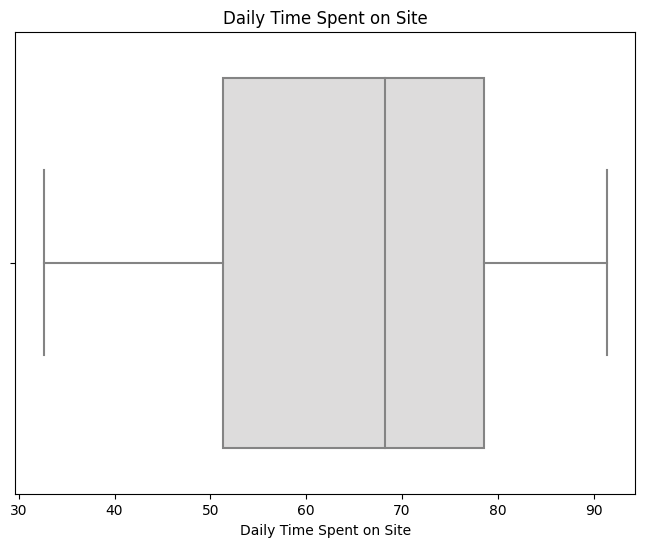

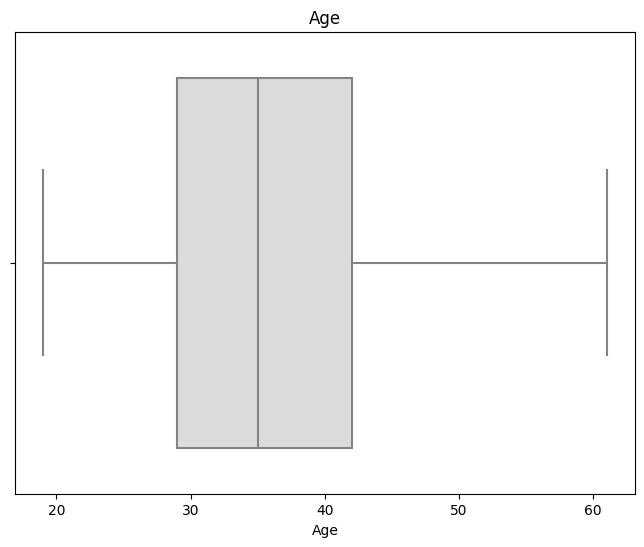

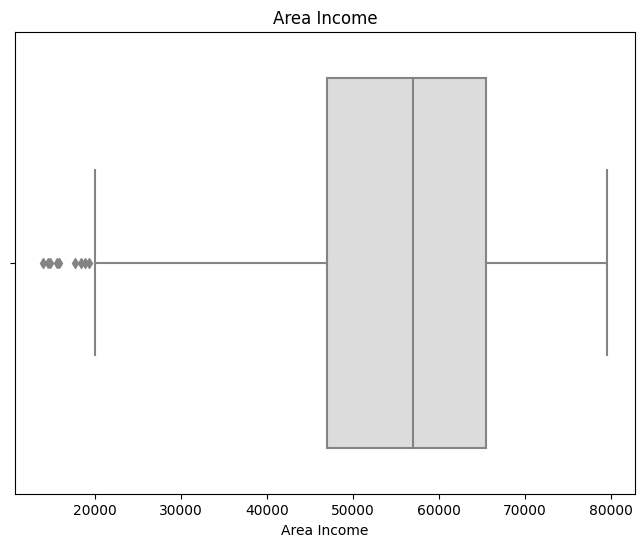

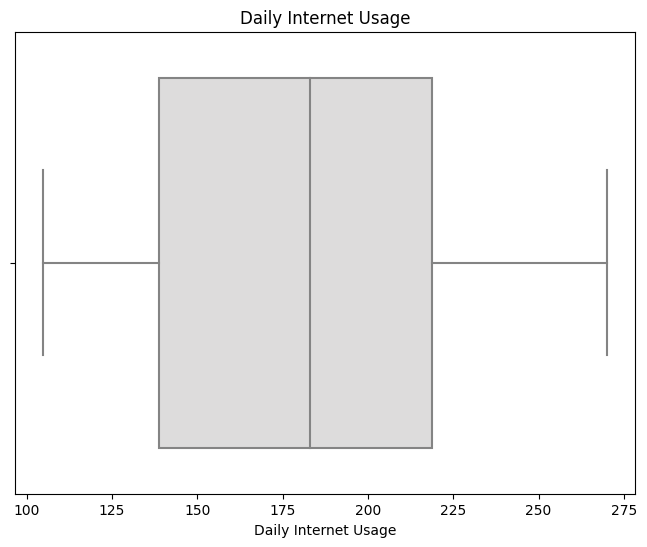

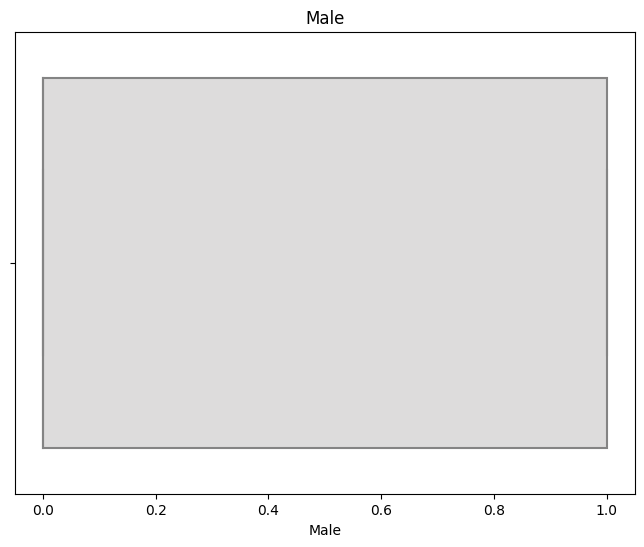

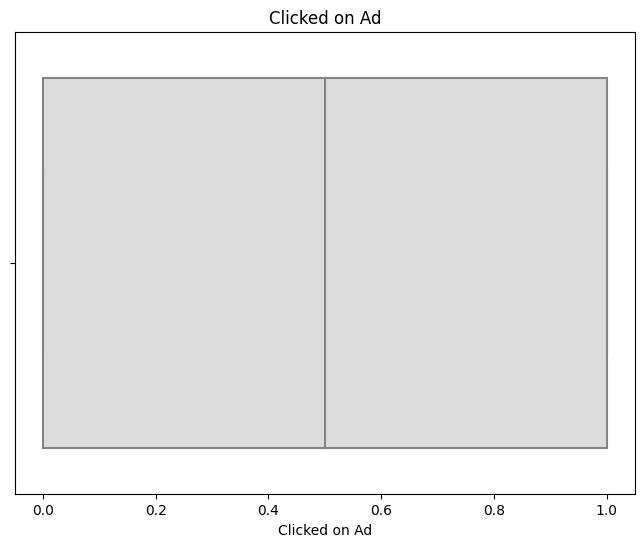

In [74]:
# univariant analysis
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=df, palette='coolwarm')
    plt.title(f'{col}')
    plt.show()

There is some outlier or noice on the Area Income features.

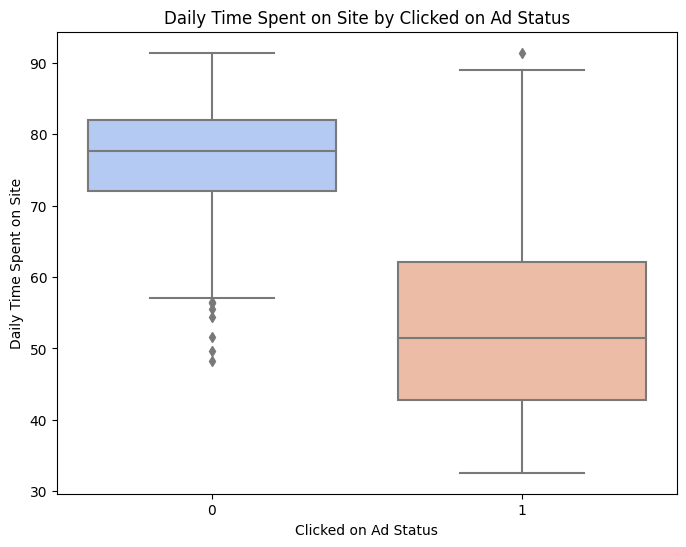

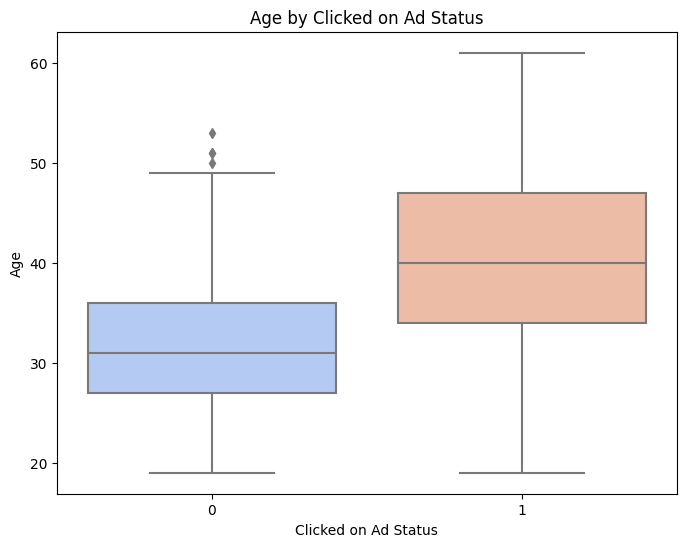

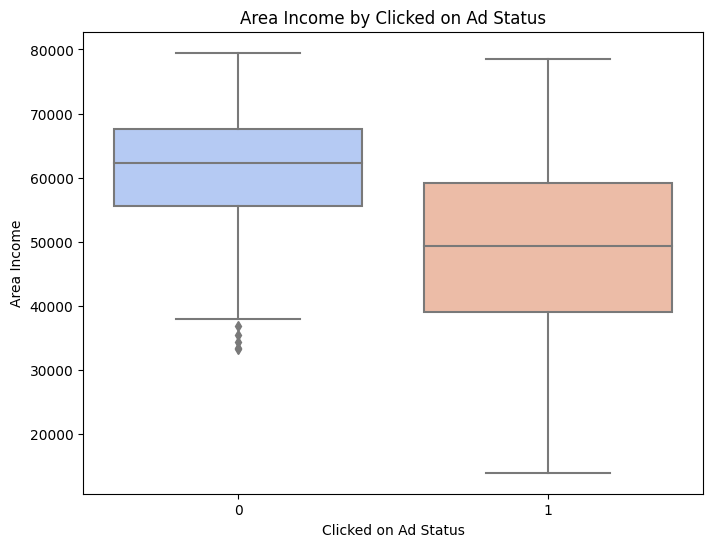

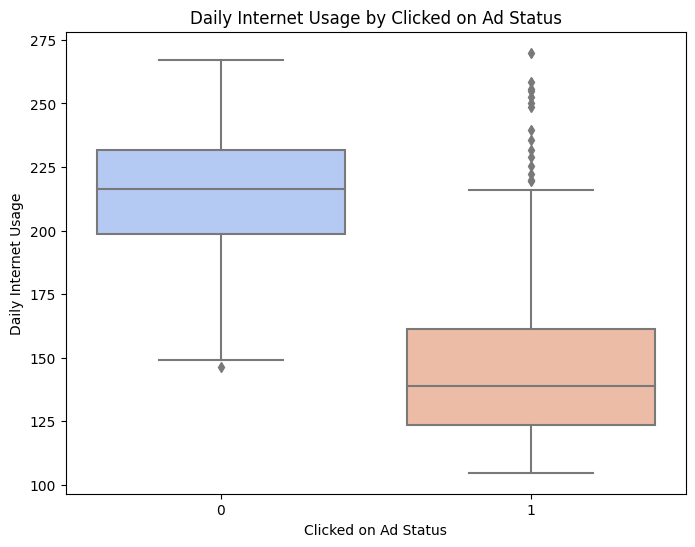

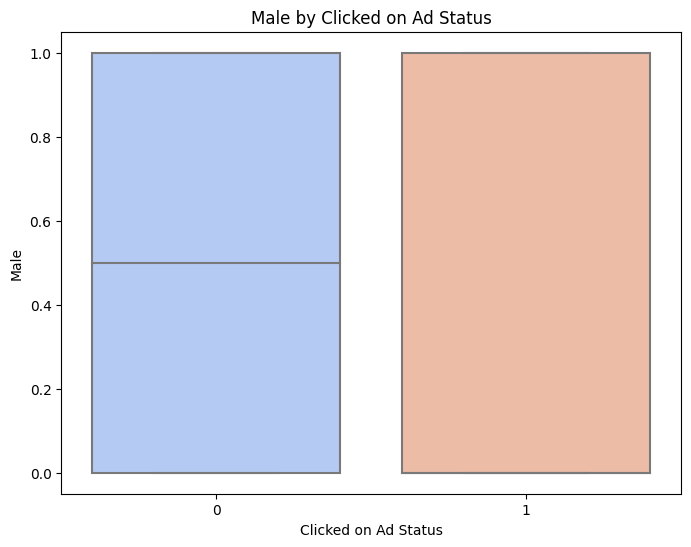

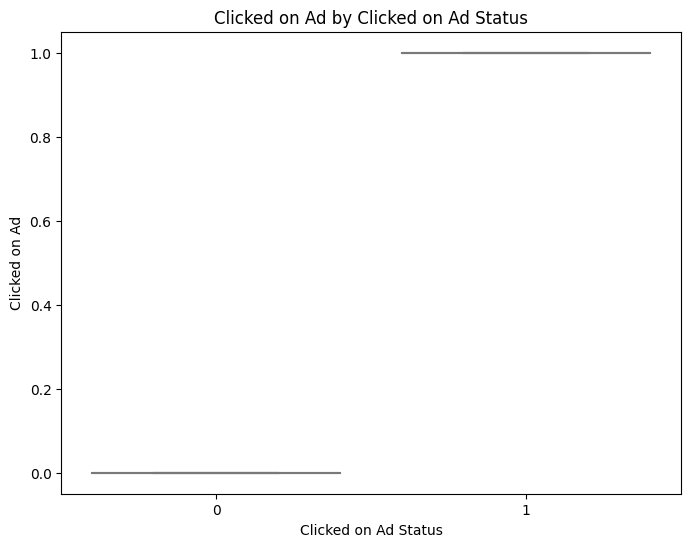

In [75]:
# Multivariate analysis
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Clicked on Ad', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} by Clicked on Ad Status')
    plt.xlabel('Clicked on Ad Status')
    plt.ylabel(col)
    plt.show()

From the above graghs of feature by clicked on ad status we can noticed that:
1. Daily Time Spent on Site the more the customers spent more time on site the trend is they are less clicking on Ad and vice versa. and there are som outlier or noices on both category.
2. Age the younger the age of customer visiting the site the less they are clicking on ad and vise versa. Also there are some or few noice in the not click on ad category.
3. Area Income the higher income the less clicking on ad and vis versa. Also there are few some noice or outlier in not click on ad category.
4. Daily Internet Usage the more user spent time on the internet they are tend to not clicking on add and vice versa. Also there are noice or outliers on both category.
5. Male there no clear effect notice for gender clicking on Ad between male or female.


In [76]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")
df.columns

Index(['daily_time_spent_on_site', 'age', 'area_income',
       'daily_internet_usage', 'male', 'clicked_on_ad'],
      dtype='object')

In [77]:
# divide the data to features x and target y
x = df.drop('clicked_on_ad', axis=1)
y = df['clicked_on_ad']

In [86]:
# split data to train and test sets 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [87]:
# Using Standard Scaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [88]:
# trying different models to compare between them
models = {"LogisticRegression": LogisticRegression(),
          "KNN": KNeighborsClassifier(n_neighbors=7),
          "SVC": SVC(),
          "NB": GaussianNB(),
          "DT": DecisionTreeClassifier(),
          "RF": RandomForestClassifier(n_estimators=30, n_jobs=-1)}

In [89]:
for name,model in models.items():
    print("----------- ", name, " -------------")
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Accuracy Score: ", accuracy_score(y_pred,y_test))
    print("Confusion Matrix: ", confusion_matrix(y_pred,y_test))
    print("Recall Score: ", recall_score(y_pred,y_test))
    print("Precision Score: ", precision_score(y_pred,y_test))
    print("-"*60)

-----------  LogisticRegression  -------------
Accuracy Score:  0.98
Confusion Matrix:  [[107   3]
 [  1  89]]
Recall Score:  0.9888888888888889
Precision Score:  0.967391304347826
------------------------------------------------------------
-----------  KNN  -------------
Accuracy Score:  0.965
Confusion Matrix:  [[108   7]
 [  0  85]]
Recall Score:  1.0
Precision Score:  0.9239130434782609
------------------------------------------------------------
-----------  SVC  -------------
Accuracy Score:  0.965
Confusion Matrix:  [[106   5]
 [  2  87]]
Recall Score:  0.9775280898876404
Precision Score:  0.9456521739130435
------------------------------------------------------------
-----------  NB  -------------
Accuracy Score:  0.97
Confusion Matrix:  [[105   3]
 [  3  89]]
Recall Score:  0.967391304347826
Precision Score:  0.967391304347826
------------------------------------------------------------
-----------  DT  -------------
Accuracy Score:  0.925
Confusion Matrix:  [[100   7]
 [  8 

Accuracy Score:  0.95
Confusion Matrix:  [[105   7]
 [  3  85]]
Recall Score:  0.9659090909090909
Precision Score:  0.9239130434782609
------------------------------------------------------------


- The LogisticRegression model shows the highest Accuracy Score of 98% asosiated with the higest recall score 99% and precision score of almost 97% we are going to select this model.

In [94]:
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)

LogisticRegression()

In [98]:
features = list(x.columns)
features

['daily_time_spent_on_site',
 'age',
 'area_income',
 'daily_internet_usage',
 'male']

In [99]:
import joblib

In [100]:
joblib.dump(model_lr, "model_lr.h5")
joblib.dump(scaler, "scaler.h5")
joblib.dump(features, "features.h5")

['features.h5']